Riya Vaze J064

In [ ]:
#IMPORTS
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')

In [ ]:
#LOADING THE DATASET
path = '/content/spam.csv'
data = pd.read_csv(path,encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#DROPPING COLUMNS
to_drop = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4']
data.drop(to_drop,axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#RENAMING COLUMNS
data.columns = ['Label','Content']
data.head()

,Label,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


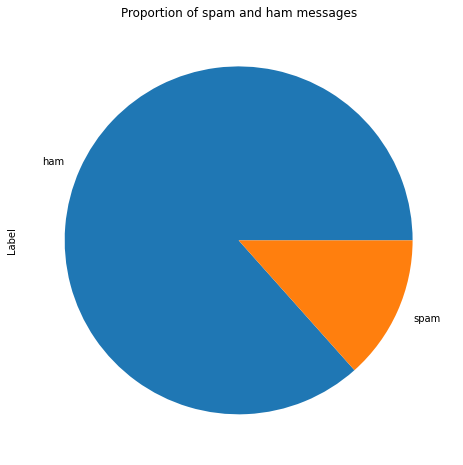

In [ ]:
#CHECKING IF DATASET IS IMBALANCED 
plt.figure(figsize=(8,8))
data['Label'].value_counts().plot(kind='pie')
plt.show()

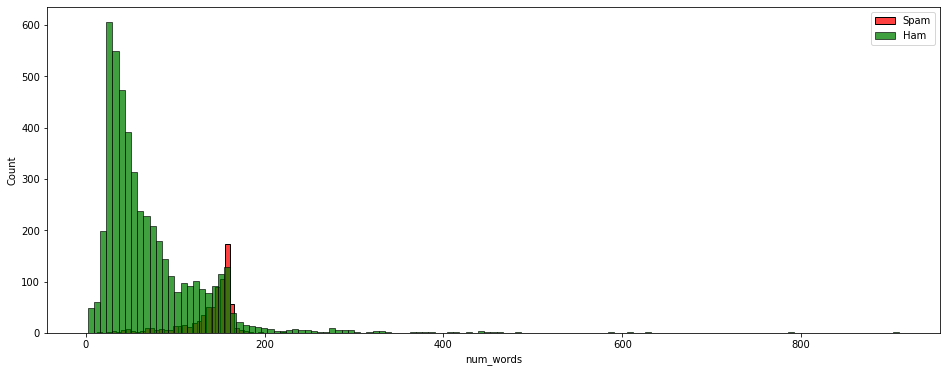

In [ ]:
spam_data = data[data['Label'] == 'spam']
spam_data['num_words'] = spam_data['Content'].apply(len)
ham_data = data[data['Label'] == 'ham']
ham_data['num_words'] = ham_data['Content'].apply(len)
plt.figure(figsize=(16,6))
sns.histplot(data=spam_data,x='num_words',color='red',label='Spam')
sns.histplot(data=ham_data,x='num_words',color='green',label='Ham')
plt.legend()
plt.show()

In [ ]:
#PREPROCESSING 
stemmer = LancasterStemmer()
stuff_to_be_removed = list(punctuation)+list(stopwords.words('english'))
def preprocess_message(message):
    # Convert it to lower case
    message = message.lower()
    # Remove stop words and punctuation and stem the message 
    message = ' '.join([stemmer.stem(msg) for msg in message.split() if msg not in stuff_to_be_removed])
    # return the message 
    return message
X = data['Content'].apply(preprocess_message)
y = data['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X = X.toarray()

In [ ]:
#SPLITTING INTO TRAIN AND TEST SET
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
def evaluate_model(model):
    trainPreds = model.predict(X_train)
    testPreds = model.predict(X_test)
    print('Classification Report for Train set')
    print(classification_report(y_true=y_train, y_pred=trainPreds))
    print('Classification Report for Test set')
    print(classification_report(y_true=y_test, y_pred=testPreds))

In [ ]:
#NAIVE BAYES
nb = GaussianNB()
nb.fit(X_train,y_train)
evaluate_model(nb)

Classification Report for Train set
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3859
           1       0.66      1.00      0.80       598

    accuracy                           0.93      4457
   macro avg       0.83      0.96      0.88      4457
weighted avg       0.95      0.93      0.94      4457

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       966
           1       0.50      0.86      0.63       149

    accuracy                           0.87      1115
   macro avg       0.74      0.86      0.78      1115
weighted avg       0.91      0.87      0.88      1115



In [ ]:
#DECISION TREE
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
evaluate_model(dt)

Classification Report for Train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00       598

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.89      0.85      0.87       149

    accuracy                           0.97      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.97      0.96      1115



In [ ]:
#RANDOM FOREST
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)
evaluate_model(rf)

Classification Report for Train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00       598

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
#XGBOOST
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)
evaluate_model(xgb)

[01:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for Train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3859
           1       1.00      0.95      0.97       598

    accuracy                           0.99      4457
   macro avg       1.00      0.97      0.98      4457
weighted avg       0.99      0.99      0.99      4457

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0